## **Machine Learning Zoomcamp 2025**

## **Homework 2**



**Dataset**

In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

--2025-10-07 14:21:23--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.03s   

2025-10-07 14:21:23 (24.9 MB/s) - ‘car_fuel_efficiency.csv’ saved [874188/874188]



In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv('car_fuel_efficiency.csv')


**Preparing the dataset**

Use only the following columns:

* 'engine_displacement',
* 'horsepower',
* 'vehicle_weight',
* 'model_year',
* 'fuel_efficiency_mpg'






In [4]:
selected_columns = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']

dataset = df[selected_columns]

**EDA**

* Look at the fuel_efficiency_mpg variable. Does it have a long tail?

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

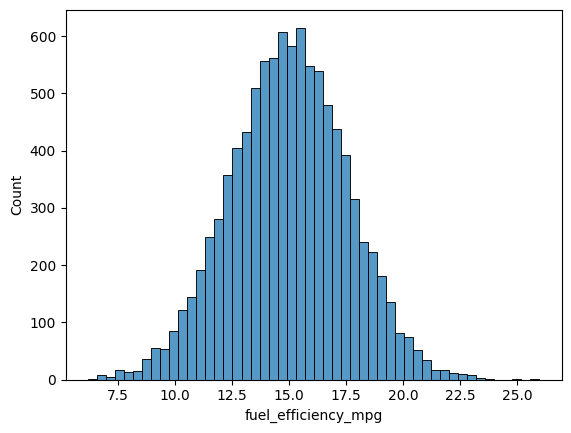

In [5]:
sns.histplot(dataset.fuel_efficiency_mpg, bins=50)

No, It doesn't have a long tail according to the historgram.

**Question 1**

There's one column with missing values. What is it?

* 'engine_displacement'
* 'horsepower'
* 'vehicle_weight'
* 'model_year'


In [6]:
dataset.isnull().sum()

,0
engine_displacement,0
horsepower,708
vehicle_weight,0
model_year,0
fuel_efficiency_mpg,0


The column with missing value is ***horsepower***.


**Question 2**

What's the median (50% percentile) for variable 'horsepower'?

* 49
* 99
* 149
* 199


In [7]:
dataset.horsepower.median()

149.0

**Prepare and split the dataset**

* Shuffle the dataset (the filtered one you created above), use seed 42.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures

In [8]:
n = len(dataset)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [9]:
idx = np.arange(n)

In [10]:
# Shuffle the dataset

np.random.seed(42)
np.random.shuffle(idx)

In [11]:
# Split dataset

df_train = dataset.iloc[idx[:n_train]]
df_val = dataset.iloc[idx[n_train:n_train+n_val]]
df_test = dataset.iloc[idx[n_train+n_val:]]

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [12]:
df_train.head(2)

,engine_displacement,horsepower,vehicle_weight,model_year
0,220,144.0,2535.887591,2009
1,160,141.0,2741.170484,2019


**Question 3**

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)
* Which option gives better RMSE?

Options:

* With 0
* With mean
* Both are equally good


In [13]:
# Train a linear regression model without regularization

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [14]:
# RMSE score

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [15]:
# Fill the missing values with zero

X_train = df_train.fillna(0)
X_val = df_val.fillna(0)
X_test= df_test.fillna(0)


# Train a linear regression model without regularization
w0, w = train_linear_regression(X_train, y_train)

# Evaluate the model
y_pred = w0 + X_val.dot(w)
rmse_score = rmse(y_val, y_pred)
score1 = round(rmse_score, 2)
print(score1)

0.52


In [16]:
# Fill the missing values with mean

mean = df_train.horsepower.mean()

X_train = df_train.fillna(mean)
X_val = df_val.fillna(mean)
X_test= df_test.fillna(mean)


# Train a linear regression model without regularization
w0, w = train_linear_regression(X_train, y_train)

# Evaluate the model
y_pred = w0 + X_val.dot(w)
rmse_score = rmse(y_val, y_pred)
score2 = round(rmse_score, 2)
print(score2)

0.46


In [17]:
if score1 < score2:
  print("With zero is better")
elif score1 > score2:
  print("With mean is better")
else:
  print("Both are equally good")

With mean is better


**Question 4**

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which r gives the best RMSE?
If there are multiple options, select the smallest r.

Options:

* 0
* 0.01
* 1
* 10
* 100

In [18]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [28]:
X_train = df_train.fillna(0)
X_val = df_val.fillna(0)
X_test= df_test.fillna(0)


for r in [0, 0.01, 0.1, 1, 5, 10, 100]:

    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    y_pred = w0 + X_val.dot(w)
    rmse_score = rmse(y_val, y_pred)
    score = round(rmse_score, 2)
    print(f"r = {r}, w0 = {w0}, score_with_2_digits = {score}")


r = 0, w0 = 28.82736547365895, score_with_2_digits = 0.52
r = 0.01, w0 = 24.92683841981215, score_with_2_digits = 0.52
r = 0.1, w0 = 11.239661084581073, score_with_2_digits = 0.52
r = 1, w0 = 1.7315979411219746, score_with_2_digits = 0.52
r = 5, w0 = 0.3638075020482907, score_with_2_digits = 0.52
r = 10, w0 = 0.18306246621686947, score_with_2_digits = 0.52
r = 100, w0 = 0.01841801730688404, score_with_2_digits = 0.52


In [29]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:

    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    y_pred = w0 + X_val.dot(w)
    rmse_score = rmse(y_val, y_pred)
    score = round(rmse_score, 2)
    print(f"r = {r}, w0 = {w0}, rmse_score = {rmse_score:.5f}")

r = 0, w0 = 28.82736547365895, rmse_score = 0.51738
r = 0.01, w0 = 24.92683841981215, rmse_score = 0.51711
r = 0.1, w0 = 11.239661084581073, rmse_score = 0.51875
r = 1, w0 = 1.7315979411219746, rmse_score = 0.52223
r = 5, w0 = 0.3638075020482907, rmse_score = 0.52289
r = 10, w0 = 0.18306246621686947, rmse_score = 0.52298
r = 100, w0 = 0.01841801730688404, rmse_score = 0.52306


***r = 0.01** gives the best RMSE.*

**Question 5**

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
* Round the result to 3 decimal digits (round(std, 3))

What's the value of std?

* 0.001
* 0.006
* 0.060
* 0.600


In [30]:
scores = []

for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train = dataset.iloc[idx[:n_train]]
    df_val = dataset.iloc[idx[n_train:n_train+n_val]]
    df_test = dataset.iloc[idx[n_train+n_val:]]

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values

    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']

    X_train = df_train.fillna(0)
    X_val = df_val.fillna(0)
    X_test= df_test.fillna(0)


    # Train a linear regression model without regularization
    w0, w = train_linear_regression(X_train, y_train)

    # Evaluate the model
    y_pred = w0 + X_val.dot(w)
    rmse_score = rmse(y_val, y_pred)

    scores.append(rmse_score)
    print(f"Seed {seed}: RMSE = {rmse_score:.5f}")


std = np.std(scores)
print(f"\nStandard deviation: {round(std, 3)}")

Seed 0: RMSE = 0.51553
Seed 1: RMSE = 0.51583
Seed 2: RMSE = 0.51283
Seed 3: RMSE = 0.50849
Seed 4: RMSE = 0.50942
Seed 5: RMSE = 0.53013
Seed 6: RMSE = 0.51423
Seed 7: RMSE = 0.51249
Seed 8: RMSE = 0.50829
Seed 9: RMSE = 0.50533

Standard deviation: 0.007


**Question 6**

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with r=0.001.
* What's the RMSE on the test dataset?

Options:

* 0.15
* 0.515
* 5.15
* 51.5

In [31]:
np.random.seed(9)
np.random.shuffle(idx)

df_train = dataset.iloc[idx[:n_train+n_val]]
df_test = dataset.iloc[idx[n_train+n_val:]]

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

del df_train['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

X_train = df_train.fillna(0)
X_test= df_test.fillna(0)


# Train a linear regression model without regularization
w0, w = train_linear_regression_reg(X_train, y_train, r = 0.001)

# Evaluate the model
y_pred = w0 + X_test.dot(w)
rmse_score = rmse(y_test, y_pred)

print(f"RMSE = {rmse_score:.5f}")


RMSE = 0.51801
